## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.2, 0.25, 0.3, 0.35]
num_neurons=[[512, 256, 128],[512, 256, 128, 128]]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for layer, dropR in itertools.product(num_neurons, Dropout_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with %d layers, Dropout rate = %.2f" % (len(layer), dropR))
    model = build_mlp(input_shape=x_train.shape[1:], num_neurons=layer, drp_ratio=dropR)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-%slayer-DropoutRate-%s" % (str(len(layer)), str(dropR))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with 3 layers, Dropout rate = 0.20
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_

Epoch 48/50
196/196 [==============================] - 3s 15ms/step - loss: 1.4009 - accuracy: 0.4965 - val_loss: 1.3904 - val_accuracy: 0.5043
Epoch 49/50
196/196 [==============================] - 3s 15ms/step - loss: 1.3913 - accuracy: 0.4978 - val_loss: 1.3907 - val_accuracy: 0.5026
Epoch 50/50
196/196 [==============================] - 3s 15ms/step - loss: 1.3925 - accuracy: 0.4972 - val_loss: 1.3881 - val_accuracy: 0.5054
Experiment with 3 layers, Dropout rate = 0.25
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
______________________________________

Epoch 45/50
196/196 [==============================] - 3s 16ms/step - loss: 1.4857 - accuracy: 0.4664 - val_loss: 1.4425 - val_accuracy: 0.4881
Epoch 46/50
196/196 [==============================] - 3s 16ms/step - loss: 1.4836 - accuracy: 0.4672 - val_loss: 1.4530 - val_accuracy: 0.4862
Epoch 47/50
196/196 [==============================] - 3s 15ms/step - loss: 1.4784 - accuracy: 0.4661 - val_loss: 1.4283 - val_accuracy: 0.4923
Epoch 48/50
196/196 [==============================] - 3s 15ms/step - loss: 1.4805 - accuracy: 0.4652 - val_loss: 1.4303 - val_accuracy: 0.4942
Epoch 49/50
196/196 [==============================] - 3s 15ms/step - loss: 1.4742 - accuracy: 0.4698 - val_loss: 1.4508 - val_accuracy: 0.4854
Epoch 50/50
196/196 [==============================] - 3s 16ms/step - loss: 1.4736 - accuracy: 0.4695 - val_loss: 1.4631 - val_accuracy: 0.4827
Experiment with 3 layers, Dropout rate = 0.30
Model: "functional_1"
_________________________________________________________________
La

Epoch 42/50
196/196 [==============================] - 3s 15ms/step - loss: 1.5963 - accuracy: 0.4250 - val_loss: 1.5521 - val_accuracy: 0.4496
Epoch 43/50
196/196 [==============================] - 3s 15ms/step - loss: 1.6010 - accuracy: 0.4207 - val_loss: 1.5556 - val_accuracy: 0.4506
Epoch 44/50
196/196 [==============================] - 3s 15ms/step - loss: 1.5915 - accuracy: 0.4261 - val_loss: 1.5256 - val_accuracy: 0.4640
Epoch 45/50
196/196 [==============================] - 3s 15ms/step - loss: 1.5956 - accuracy: 0.4248 - val_loss: 1.5478 - val_accuracy: 0.4610
Epoch 46/50
196/196 [==============================] - 3s 16ms/step - loss: 1.5873 - accuracy: 0.4300 - val_loss: 1.5390 - val_accuracy: 0.4587
Epoch 47/50
196/196 [==============================] - 3s 15ms/step - loss: 1.5866 - accuracy: 0.4265 - val_loss: 1.5237 - val_accuracy: 0.4658
Epoch 48/50
196/196 [==============================] - 3s 15ms/step - loss: 1.5863 - accuracy: 0.4274 - val_loss: 1.5409 - val_accuracy:

Epoch 39/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6858 - accuracy: 0.3919 - val_loss: 1.6883 - val_accuracy: 0.4095
Epoch 40/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6888 - accuracy: 0.3897 - val_loss: 1.6537 - val_accuracy: 0.4221
Epoch 41/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6904 - accuracy: 0.3861 - val_loss: 1.6185 - val_accuracy: 0.4348
Epoch 42/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6816 - accuracy: 0.3908 - val_loss: 1.6391 - val_accuracy: 0.4250
Epoch 43/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6855 - accuracy: 0.3882 - val_loss: 1.6308 - val_accuracy: 0.4271
Epoch 44/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6828 - accuracy: 0.3883 - val_loss: 1.6426 - val_accuracy: 0.4272
Epoch 45/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6863 - accuracy: 0.3881 - val_loss: 1.6349 - val_accuracy:

196/196 [==============================] - 3s 16ms/step - loss: 1.5124 - accuracy: 0.4551 - val_loss: 1.4583 - val_accuracy: 0.4811
Epoch 34/50
196/196 [==============================] - 3s 16ms/step - loss: 1.5031 - accuracy: 0.4614 - val_loss: 1.4736 - val_accuracy: 0.4782
Epoch 35/50
196/196 [==============================] - 3s 16ms/step - loss: 1.5103 - accuracy: 0.4599 - val_loss: 1.4565 - val_accuracy: 0.4813
Epoch 36/50
196/196 [==============================] - 3s 16ms/step - loss: 1.5007 - accuracy: 0.4606 - val_loss: 1.4610 - val_accuracy: 0.4856
Epoch 37/50
196/196 [==============================] - 3s 16ms/step - loss: 1.5010 - accuracy: 0.4622 - val_loss: 1.4743 - val_accuracy: 0.4747
Epoch 38/50
196/196 [==============================] - 3s 16ms/step - loss: 1.4921 - accuracy: 0.4640 - val_loss: 1.4552 - val_accuracy: 0.4873
Epoch 39/50
196/196 [==============================] - 3s 16ms/step - loss: 1.4809 - accuracy: 0.4685 - val_loss: 1.4676 - val_accuracy: 0.4788
Epoc

196/196 [==============================] - 3s 16ms/step - loss: 1.5932 - accuracy: 0.4271 - val_loss: 1.5573 - val_accuracy: 0.4518
Epoch 29/50
196/196 [==============================] - 3s 16ms/step - loss: 1.5784 - accuracy: 0.4318 - val_loss: 1.5177 - val_accuracy: 0.4625
Epoch 30/50
196/196 [==============================] - 3s 16ms/step - loss: 1.5834 - accuracy: 0.4313 - val_loss: 1.5470 - val_accuracy: 0.4457
Epoch 31/50
196/196 [==============================] - 3s 16ms/step - loss: 1.5682 - accuracy: 0.4350 - val_loss: 1.5339 - val_accuracy: 0.4591
Epoch 32/50
196/196 [==============================] - 3s 16ms/step - loss: 1.5700 - accuracy: 0.4360 - val_loss: 1.5341 - val_accuracy: 0.4642
Epoch 33/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5744 - accuracy: 0.4332 - val_loss: 1.5122 - val_accuracy: 0.4641
Epoch 34/50
196/196 [==============================] - 3s 16ms/step - loss: 1.5671 - accuracy: 0.4381 - val_loss: 1.5124 - val_accuracy: 0.4670
Epoc

196/196 [==============================] - 3s 17ms/step - loss: 1.6892 - accuracy: 0.3870 - val_loss: 1.5998 - val_accuracy: 0.4319
Epoch 24/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6905 - accuracy: 0.3845 - val_loss: 1.6478 - val_accuracy: 0.4175
Epoch 25/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6874 - accuracy: 0.3869 - val_loss: 1.6113 - val_accuracy: 0.4207
Epoch 26/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6769 - accuracy: 0.3921 - val_loss: 1.6298 - val_accuracy: 0.4147
Epoch 27/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6657 - accuracy: 0.3973 - val_loss: 1.6334 - val_accuracy: 0.4108
Epoch 28/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6690 - accuracy: 0.3951 - val_loss: 1.6014 - val_accuracy: 0.4337
Epoch 29/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6720 - accuracy: 0.3916 - val_loss: 1.6084 - val_accuracy: 0.4285
Epoc

196/196 [==============================] - 3s 16ms/step - loss: 1.8078 - accuracy: 0.3359 - val_loss: 1.7722 - val_accuracy: 0.3696
Epoch 19/50
196/196 [==============================] - 3s 17ms/step - loss: 1.8017 - accuracy: 0.3373 - val_loss: 1.7863 - val_accuracy: 0.3805
Epoch 20/50
196/196 [==============================] - 3s 17ms/step - loss: 1.8094 - accuracy: 0.3389 - val_loss: 1.7572 - val_accuracy: 0.3806
Epoch 21/50
196/196 [==============================] - 3s 16ms/step - loss: 1.8032 - accuracy: 0.3400 - val_loss: 1.7387 - val_accuracy: 0.3947
Epoch 22/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7903 - accuracy: 0.3417 - val_loss: 1.7259 - val_accuracy: 0.3960
Epoch 23/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7930 - accuracy: 0.3429 - val_loss: 1.8030 - val_accuracy: 0.3676
Epoch 24/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7887 - accuracy: 0.3433 - val_loss: 1.7221 - val_accuracy: 0.3941
Epoc

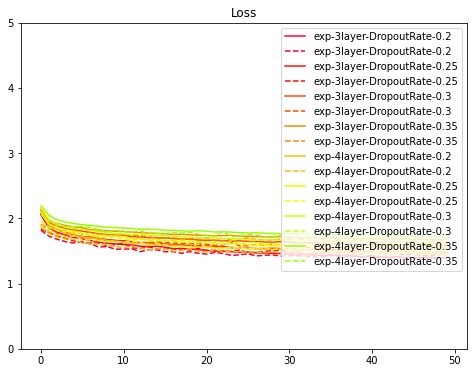

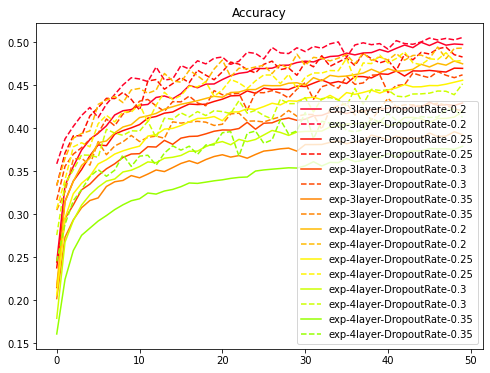

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 25

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()